## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Importing Dataframes

In [3]:
path = r"/Users/katalysenko/Documents/Instacart Basket Analysis"

In [4]:
ords_prods_merge = pd.read_pickle(r"/Users/katalysenko/Documents/Instacart Basket Analysis/02 Data/Prepared Data/orders_products_merged_updated_2.pkl")

In [7]:
ords_prods_merge.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,price_range_loc,Busiest day,Busiest days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_orders,order_frequency_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,14.0,High spender,20.5,Non-frequent customer
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Mid-range product,Least busy days,Least busy days,Average orders,10,New customer,14.0,High spender,20.5,Non-frequent customer
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Mid-range product,Least busy days,Least busy days,Most orders,10,New customer,14.0,High spender,20.5,Non-frequent customer
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Mid-range product,Least busy days,Least busy days,Average orders,10,New customer,14.0,High spender,20.5,Non-frequent customer
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Mid-range product,Least busy days,Least busy days,Most orders,10,New customer,14.0,High spender,20.5,Non-frequent customer


## Creating Bar Charts

<Axes: xlabel='order_dow'>

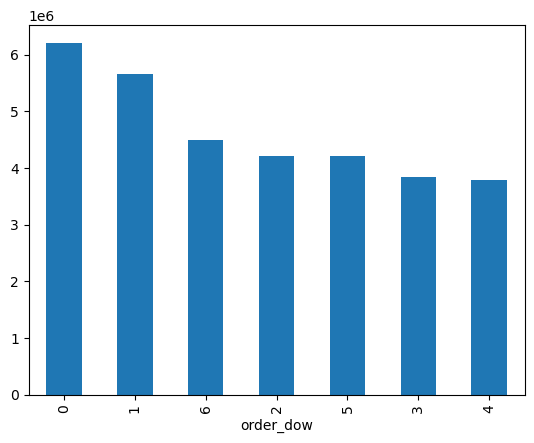

In [8]:
ords_prods_merge['order_dow'].value_counts().plot.bar()

<Axes: xlabel='order_dow'>

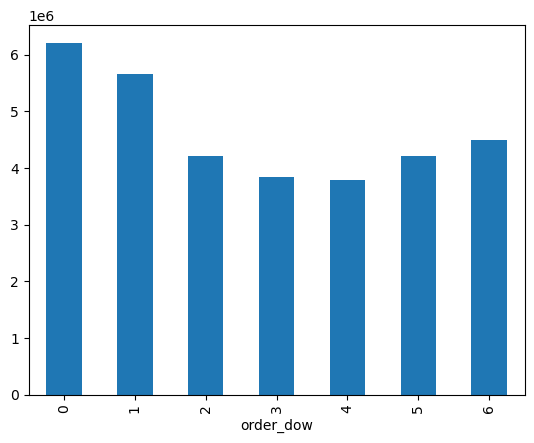

In [10]:
ords_prods_merge['order_dow'].value_counts().sort_index().plot.bar()

In [11]:
ords_prods_merge['order_dow'].value_counts()

order_dow
0    6209632
1    5665830
6    4500246
2    4217766
5    4209449
3    3844096
4    3787193
Name: count, dtype: int64

In [12]:
ords_prods_merge['order_dow'].value_counts().sort_index()

order_dow
0    6209632
1    5665830
2    4217766
3    3844096
4    3787193
5    4209449
6    4500246
Name: count, dtype: int64

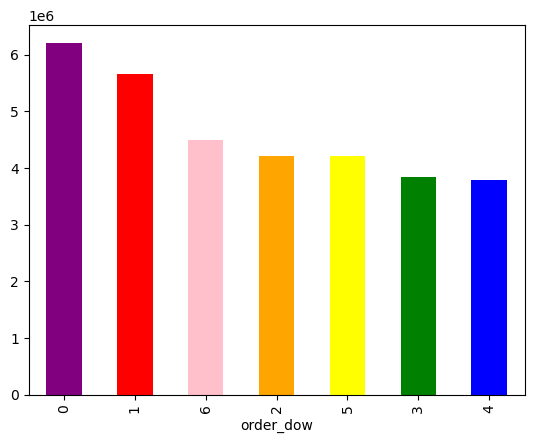

In [13]:
bar = ords_prods_merge['order_dow'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [14]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_order_dow.png'))

## Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

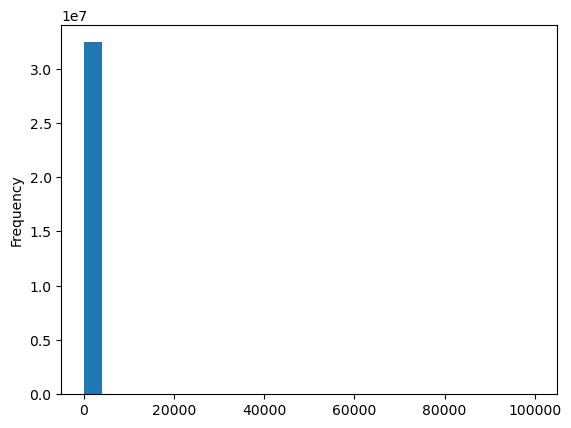

In [15]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [16]:
ords_prods_merge['prices'].describe()

count    3.243421e+07
mean     1.198114e+01
std      4.954311e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

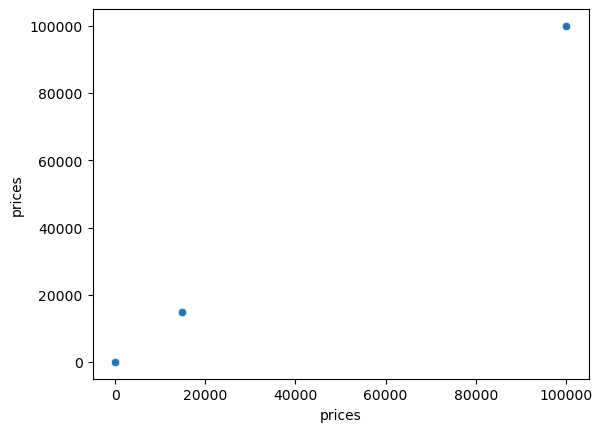

In [18]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [19]:
# Check outliers

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,price_range_loc,Busiest day,Busiest days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_orders,order_frequency_flag
10030345,912404,17,prior,12,2,14,5.0,21553,5,0,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,14900.0,High spender,5.0,Frequent customer
10030346,603376,17,prior,22,6,16,4.0,21553,3,1,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,14900.0,High spender,5.0,Frequent customer
10030347,3264360,135,prior,2,2,21,13.0,21553,6,0,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,14900.0,High spender,12.0,Regular customer
10030348,892534,135,prior,3,0,8,12.0,21553,3,1,...,High-range product,Busiest days,Busiest days,Average orders,4,New customer,14900.0,High spender,12.0,Regular customer
10030349,229704,342,prior,8,1,19,30.0,21553,9,0,...,High-range product,Busiest days,Busiest days,Average orders,16,Regular customer,14900.0,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29193268,2249946,204099,prior,29,0,8,4.0,33664,1,0,...,High-range product,Busiest days,Busiest days,Average orders,39,Regular customer,99999.0,High spender,4.0,Frequent customer
29193269,2363282,204099,prior,31,0,9,2.0,33664,1,1,...,High-range product,Busiest days,Busiest days,Most orders,39,Regular customer,99999.0,High spender,4.0,Frequent customer
29193270,3181945,204395,prior,13,3,15,8.0,33664,25,0,...,High-range product,Least busy days,Least busy days,Most orders,15,Regular customer,99999.0,High spender,5.0,Frequent customer
29193271,2486215,205227,prior,7,3,20,4.0,33664,8,0,...,High-range product,Least busy days,Least busy days,Average orders,12,Regular customer,99999.0,High spender,12.0,Regular customer


In [20]:
# For now, let’s mark them as missing since they don’t make sense in terms of the other values in the column. To turn them into NaNs, use the following code:

ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [23]:
ords_prods_merge['prices'].max()

25.0

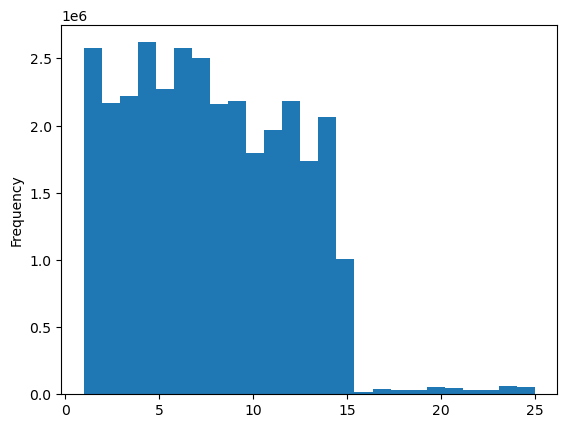

In [24]:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

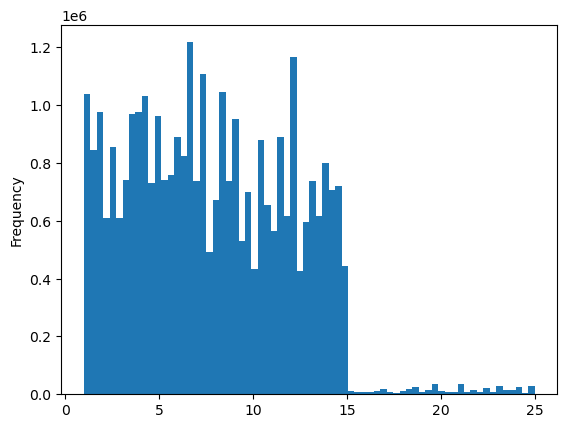

In [25]:
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [27]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'histogram.png'))

## Sampling Data

In [28]:
# Create a list holding True/False values to the test np.random.rant() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [29]:
dev

array([False,  True, False, ..., False,  True,  True])

In [31]:
np.random.rand(10)

array([0.04368635, 0.41602642, 0.88973306, 0.66299301, 0.78345326,
       0.02169353, 0.79078115, 0.45980038, 0.17173956, 0.40628592])

In [32]:
# Store 70%  of the sample in the dataframe bi

big = ords_prods_merge[dev]

In [33]:
# Store 30% of the sample in the data

small = ords_prods_merge[~dev]

In [34]:
len(ords_prods_merge)

32434212

In [35]:
len(big) + len(small)

32434212

In [36]:
df_2 = small [['order_dow', 'prices']]

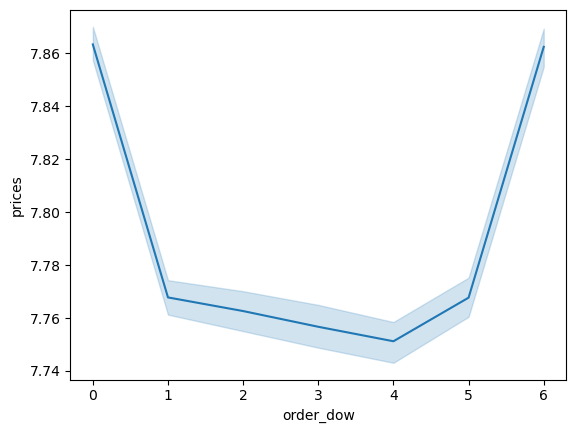

In [37]:
line = sns.lineplot(data = df_2, x = 'order_dow', y = 'prices')

In [38]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_chart.png'))